In [3]:
import pandas as pd
import numpy as np
import sys 
sys.path.append('/utils/')
from connection import get_connection
conn = get_connection()
sql_cont1 = '''

'''

def get_data(sql_cont):
    data = pd.read_sql(sql_cont, con = conn)
    return data



sql_cont1 = '''
select * from `nft_transactions` where  lower(`nft_transactions`.`collection_contract_address`)=lower('0x34d85c9CDeB23FA97cb08333b511ac86E1C4E258')
'''
sql_cont2 = '''
select * from `nft_transfers` where lower(`nft_transfers`.`token_address`)=lower('0x34d85c9CDeB23FA97cb08333b511ac86E1C4E258') 
'''

print("get_data(sql_cont1)")
nft_tra_data = get_data(sql_cont1)
print("get_data(sql_cont2)")
nft_tsf_data = get_data(sql_cont2)
col1 = ['transaction_hash','log_index','nft_token_id', 'block_number','block_date','block_timestamp','seller_address','buyer_address','amount']
col2 = ['transaction_hash','log_index','nft_token_id','block_number','block_date','block_timestamp','from_address','to_address']
nft_tsf_data_new = nft_tsf_data[col2]
nft_tsf_data_new = nft_tsf_data_new.rename(columns={'from_address':'seller_address',
                                                   'to_address':'buyer_address'})


nft_tsf_data_new['amount'] = 0
nft_tra_data_new = nft_tra_data[col1]
nft_data = pd.concat([nft_tsf_data_new,nft_tra_data_new],ignore_index=True)
print("开始排序")
nft_data['rank11'] = nft_data.groupby(['seller_address','buyer_address','nft_token_id','block_timestamp']).amount.transform(lambda x:x.rank(ascending=False))
nft_data = nft_data[nft_data['rank11']==1]


print("排序完成")

nft_data = nft_data.sort_values(by=['block_timestamp','block_number'])
nft_data = nft_data.drop_duplicates()
nft_data['rank1'] = nft_data.groupby(['nft_token_id','block_timestamp']).log_index.transform(lambda x:x.rank())
nft_data_cp = nft_data[['nft_token_id','block_timestamp']].drop_duplicates()

nft_data_cp['rank2'] = nft_data_cp.groupby(['nft_token_id']).block_timestamp.transform(lambda x:x.rank())
nft_data = nft_data.merge(nft_data_cp,how='left',on=['nft_token_id','block_timestamp'])
nft_data['rank_final'] = nft_data['rank1'] + nft_data['rank2']*0.1
nft_data['rank3'] = nft_data.groupby(['nft_token_id']).rank_final.transform(lambda x:x.rank())

tg_cols = ['seller_address','buyer_address','nft_token_id','amount']
nft_data_new = nft_data[tg_cols]

nft_data_new.head()



get_data(sql_cont1)
get_data(sql_cont2)
开始排序
排序完成


,seller_address,buyer_address,nft_token_id,amount
0,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,30000,0.0
1,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,30001,0.0
2,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,30002,0.0
3,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,30003,0.0
4,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,30004,0.0


In [4]:
def get_amount_statu(df):
    if df['amount'] > 0:
        return 2
    else:
        return 1
add_cols = ['seller_address','buyer_address']
nft_data_new['max_address'] = nft_data[add_cols].max(axis=1)
nft_data_new['min_address'] = nft_data[add_cols].min(axis=1)
nft_data_new['weight'] = nft_data_new.apply(get_amount_statu,axis=1)
nft_data_new['weight1'] = (nft_data_new['amount'] > 0).astype(int)


nft_data_new.head()

/tmp/ipykernel_27535/1728891156.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_data_new['max_address'] = nft_data[add_cols].max(axis=1)
/tmp/ipykernel_27535/1728891156.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_data_new['min_address'] = nft_data[add_cols].min(axis=1)
/tmp/ipykernel_27535/1728891156.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,seller_address,buyer_address,nft_token_id,amount,max_address,min_address,weight,weight1
0,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,30000,0.0,0xef9497439548c5967b179d80a49e829efa2a9300,0x0000000000000000000000000000000000000000,1,0
1,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,30001,0.0,0xef9497439548c5967b179d80a49e829efa2a9300,0x0000000000000000000000000000000000000000,1,0
2,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,30002,0.0,0xef9497439548c5967b179d80a49e829efa2a9300,0x0000000000000000000000000000000000000000,1,0
3,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,30003,0.0,0xef9497439548c5967b179d80a49e829efa2a9300,0x0000000000000000000000000000000000000000,1,0
4,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,30004,0.0,0xef9497439548c5967b179d80a49e829efa2a9300,0x0000000000000000000000000000000000000000,1,0


In [5]:
zero_ads = '0x0000000000000000000000000000000000000000'
select_con = (nft_data_new['seller_address'] != zero_ads) & (nft_data_new['buyer_address'] != zero_ads)
nft_data_new = nft_data_new[select_con]
nft_data_new.shape

(149209, 8)

In [6]:
nft_data_desc = nft_data_new.groupby(['max_address','min_address']).agg({'weight':'sum','nft_token_id':'nunique','weight1':'sum'}).reset_index()

nft_data_new2 = nft_data_new.groupby(['max_address','min_address']).agg({'nft_token_id':'unique'}).reset_index()
nft_data_new2 = nft_data_new2.rename(columns={'nft_token_id':'nft_list'})

nft_data_desc = nft_data_desc.merge(nft_data_new2,how='left',on=['max_address','min_address'])
nft_data_desc.head()
# nft_data_desc.head()

,max_address,min_address,weight,nft_token_id,weight1,nft_list
0,0x00000003a567e3002f04d5d3db1abf0f94c43d11,0x00000000e7fc8fd904374460228f2fc5c2221408,1,1,0,[99655]
1,0x005fe151d9185a30a11b3fc7233ca3b2cfee7ec5,0x002a99690ab1989b7971db28cd4a7673e1e6f495,2,1,1,[87744]
2,0x007f97f5abade6757c66211449b23fdd82613854,0x00000000a50bb64b4bbeceb18715748dface08af,4,2,2,"[99682, 98424]"
3,0x007f97f5abade6757c66211449b23fdd82613854,0x007f97f5abade6757c66211449b23fdd82613854,2,1,1,[84245]
4,0x00dc591dcf57341c6fe4ad1ecf565b50f9059c27,0x0000000035634b55f3d99b071b5a354f48e10bef,2,1,1,[64210]


In [7]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

In [8]:
G = nx.from_pandas_edgelist(nft_data_desc, "max_address", "min_address",
                             edge_attr=True,
                             create_using=nx.Graph())

# 对图数据进行社群划分
partition = community_louvain.best_partition(G)
'done'

'done'

In [9]:
import pandas as pd
df_group = pd.DataFrame({'Id':partition.keys(),'Group':partition.values()})
df_group.head()

,Id,Group
0,0x00000003a567e3002f04d5d3db1abf0f94c43d11,0
1,0x00000000e7fc8fd904374460228f2fc5c2221408,0
2,0x005fe151d9185a30a11b3fc7233ca3b2cfee7ec5,1
3,0x002a99690ab1989b7971db28cd4a7673e1e6f495,2
4,0x007f97f5abade6757c66211449b23fdd82613854,3


In [10]:
nft_data_group = nft_data_desc.merge(df_group,how='left',left_on=['max_address'],right_on=['Id'])
del nft_data_group['Id']
nft_data_group = nft_data_group.rename(columns={'Group':'Group1'})
nft_data_group = nft_data_group.merge(df_group,how='left',left_on=['min_address'],right_on=['Id'])
del nft_data_group['Id']
nft_data_group = nft_data_group.rename(columns={'Group':'Group2'})
nft_data_group.head()

,max_address,min_address,weight,nft_token_id,weight1,nft_list,Group1,Group2
0,0x00000003a567e3002f04d5d3db1abf0f94c43d11,0x00000000e7fc8fd904374460228f2fc5c2221408,1,1,0,[99655],0,0
1,0x005fe151d9185a30a11b3fc7233ca3b2cfee7ec5,0x002a99690ab1989b7971db28cd4a7673e1e6f495,2,1,1,[87744],1,2
2,0x007f97f5abade6757c66211449b23fdd82613854,0x00000000a50bb64b4bbeceb18715748dface08af,4,2,2,"[99682, 98424]",3,4
3,0x007f97f5abade6757c66211449b23fdd82613854,0x007f97f5abade6757c66211449b23fdd82613854,2,1,1,[84245],3,3
4,0x00dc591dcf57341c6fe4ad1ecf565b50f9059c27,0x0000000035634b55f3d99b071b5a354f48e10bef,2,1,1,[64210],5,6


In [11]:
nft_data_group['sample_group'] = (nft_data_group['Group1'] == nft_data_group['Group2']).astype(int)
nft_data_group.head()

,max_address,min_address,weight,nft_token_id,weight1,nft_list,Group1,Group2,sample_group
0,0x00000003a567e3002f04d5d3db1abf0f94c43d11,0x00000000e7fc8fd904374460228f2fc5c2221408,1,1,0,[99655],0,0,1
1,0x005fe151d9185a30a11b3fc7233ca3b2cfee7ec5,0x002a99690ab1989b7971db28cd4a7673e1e6f495,2,1,1,[87744],1,2,0
2,0x007f97f5abade6757c66211449b23fdd82613854,0x00000000a50bb64b4bbeceb18715748dface08af,4,2,2,"[99682, 98424]",3,4,0
3,0x007f97f5abade6757c66211449b23fdd82613854,0x007f97f5abade6757c66211449b23fdd82613854,2,1,1,[84245],3,3,1
4,0x00dc591dcf57341c6fe4ad1ecf565b50f9059c27,0x0000000035634b55f3d99b071b5a354f48e10bef,2,1,1,[64210],5,6,0


In [12]:
nft_data_group['sample_group'].value_counts()

1    72082
0    24652
Name: sample_group, dtype: int64

In [13]:
# ,'nft_token_id':'mean'
nft_median = nft_data_group[nft_data_group['sample_group'] == 1].groupby(['Group1']).agg({'weight':'mean','nft_token_id':'median','weight1':'mean'})
nft_median.head()

,weight,nft_token_id,weight1
Group1,,,
0,2.213930,1.0,0.601990
1,2.382060,1.0,0.551495
2,2.835190,1.0,0.876664
3,2.179372,1.0,0.473094
4,1.970408,1.0,0.556122


In [14]:
'done'

'done'

In [15]:
np.percentile(nft_median['weight'],90)

2.040688055735519

In [16]:
np.percentile(nft_median['nft_token_id'],25)

1.0

In [17]:
np.percentile(nft_median['weight1'],90)

0.5698668007036944

In [18]:
nft_median[(nft_median['weight'] >= 2.04) & (nft_median['nft_token_id'] == 1) & (nft_median['weight1'] >= 0.5)].index.tolist()

[0,
 1,
 2,
 5,
 10,
 11,
 12,
 15,
 17,
 18,
 21,
 22,
 24,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 39,
 40,
 42,
 45,
 48,
 52,
 54,
 56,
 57,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 74,
 75,
 79,
 80,
 81,
 84,
 85,
 87,
 92,
 93,
 96,
 104,
 105,
 107,
 109,
 112,
 113,
 125,
 126,
 128,
 133,
 134,
 139,
 162,
 166,
 404,
 423,
 448,
 614,
 1011,
 1115,
 1299,
 1470,
 1555,
 1910,
 2181,
 2274,
 2501,
 2805]

In [19]:
[0,
 1,
 2,
 5,
 10,
 11,
 12,
 15,
 17,
 18,
 21,
 22,
 24,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 39,
 40,
 42,
 45,
 48,
 52,
 54,
 56,
 57,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 74,
 75,
 79,
 80,
 81,
 84,
 85,
 87,
 92,
 93,
 96,
 104,
 105,
 107,
 109,
 112,
 113,
 125,
 126,
 128,
 133,
 134,
 139,
 162,
 166,
 404,
 423,
 448,
 614,
 1011,
 1115,
 1299,
 1470,
 1555,
 1910,
 2181,
 2274,
 2501,
 2805]

[0,
 1,
 2,
 5,
 10,
 11,
 12,
 15,
 17,
 18,
 21,
 22,
 24,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 39,
 40,
 42,
 45,
 48,
 52,
 54,
 56,
 57,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 74,
 75,
 79,
 80,
 81,
 84,
 85,
 87,
 92,
 93,
 96,
 104,
 105,
 107,
 109,
 112,
 113,
 125,
 126,
 128,
 133,
 134,
 139,
 162,
 166,
 404,
 423,
 448,
 614,
 1011,
 1115,
 1299,
 1470,
 1555,
 1910,
 2181,
 2274,
 2501,
 2805]

In [20]:
nft_data_group[
    (nft_data_group['nft_token_id'] <= 1) 
    & 
               (nft_data_group['weight1'] >= 2)
]

,max_address,min_address,weight,nft_token_id,weight1,nft_list,Group1,Group2,sample_group
894,0x18d82cc691754ea6db4018004de61fce8a63f392,0x011df7520739f2a635a708138cc3e86f422a3499,4,1,2,[82641],15,15,1
2403,0x2727021c3770113c3dbe00db1e1fc268365800a5,0x18d82cc691754ea6db4018004de61fce8a63f392,4,1,2,[65352],15,15,1
13149,0x5e2eabfaddf49615f84734724b77eeeebc5ebd71,0x3b2a887ca2d31795f664cf34db66b6e5f80144ba,4,1,2,[89501],1,1,1
13731,0x60577490f99712525e4a36d559256c6f99c788f3,0x23c9b27441d2a0fc8c4606a56f77809d63428f8e,4,1,2,[84909],2,2,1
15402,0x66625aa7f56da95678075ec2baddf7a5f1888888,0x18d82cc691754ea6db4018004de61fce8a63f392,4,1,2,[99921],15,15,1
16230,0x6948d7b5980e79fb949c862594a2477ca089974f,0x2b8146b30a8dcc29240ae01a0e127f7f58505c62,4,1,2,[16976],2,65,0
23215,0x7e345a2a7c6ab50eeba694b4a5f98898eca59bcc,0x0386d0eea3dddf2445d3546f9c9ada8d81753b8f,4,1,2,[73562],2,2,1
25157,0x837e6fd5d2b39b6fd2791ba8a4a364d104c18e15,0x2156001ecebe8fdcd46c0c9be0738d48b2e98d58,34,1,17,[55343],33,33,1
31350,0x8e592fe4937af268036861424ac1c83443338305,0x40f0d5d9e184207bda6de7a629141ae0a32ceb3b,4,1,2,[47976],2,2,1
38840,0x9f28152ae399a6f1b9760c04972de4f9303c0c9f,0x6da432f786cc7ed871b5571bfc192e8e4b37c7bb,4,1,2,[46316],2,95,0


In [21]:
nft_data_group[
    (nft_data_group['Group1'] ==33) 
#     & 
#                (nft_data_group['weight1'] >= 2)
].sort_values(by=['nft_token_id','weight1','weight'],ascending=False)

,max_address,min_address,weight,nft_token_id,weight1,nft_list,Group1,Group2,sample_group
66185,0xd2d40d5161468be2b98a78d1a145a53d10ad3896,0x9e64b47bbdb9c1f7b599f11987b84c416c0c4110,39,39,0,"[6281, 7581, 4707, 6289, 6284, 3008, 3009, 301...",33,33,1
90981,0xf89d8b738989cfed0e71670efc208a1894d9810d,0x6c6591979703f23296067931d8681f8c705cbb62,23,23,0,"[23472, 23462, 23467, 23456, 7576, 7582, 23466...",33,33,1
90982,0xf89d8b738989cfed0e71670efc208a1894d9810d,0xd2d40d5161468be2b98a78d1a145a53d10ad3896,23,23,0,"[23462, 23472, 23467, 23456, 7576, 7582, 23457...",33,33,1
82266,0xec79de36ffca3d7136651a51963835159852a497,0x9ed545506691389c96260563e44ee76a90d939df,12,12,0,"[93412, 3799, 94509, 27865, 79580, 79581, 259,...",33,33,1
65128,0xd13ba43ade61f578216c8826dab12ef3bffc5016,0x7675cf4abb1a19f7bd5ed23d132f9dffa0c9587d,10,10,0,"[71257, 93004, 89546, 98143, 7985, 3138, 7620,...",33,33,1
...,...,...,...,...,...,...,...,...,...
92040,0xf9896153e27228ec7963dafb6760c817a2b79125,0x5fb35140f90e18ba5980b7cfa090ecd803257e9b,1,1,0,[78334],33,33,1
92177,0xf9bf55f6b9311023ff2eaaccad27e217a852994f,0x566b35812a6ada4a0c9ca6f06da4d180daec01fc,1,1,0,[59762],33,33,1
94758,0xfd12b33cd55b073d1561e6fcb986cbd9c1ded586,0x6cc99abc7e8cc8520d1b2d35b50512ed4a7963e2,1,1,0,[15040],33,33,1
94759,0xfd12b33cd55b073d1561e6fcb986cbd9c1ded586,0xb375e1bd10727fc2336d70f218bace6ffdefcb63,1,1,0,[15040],33,33,1


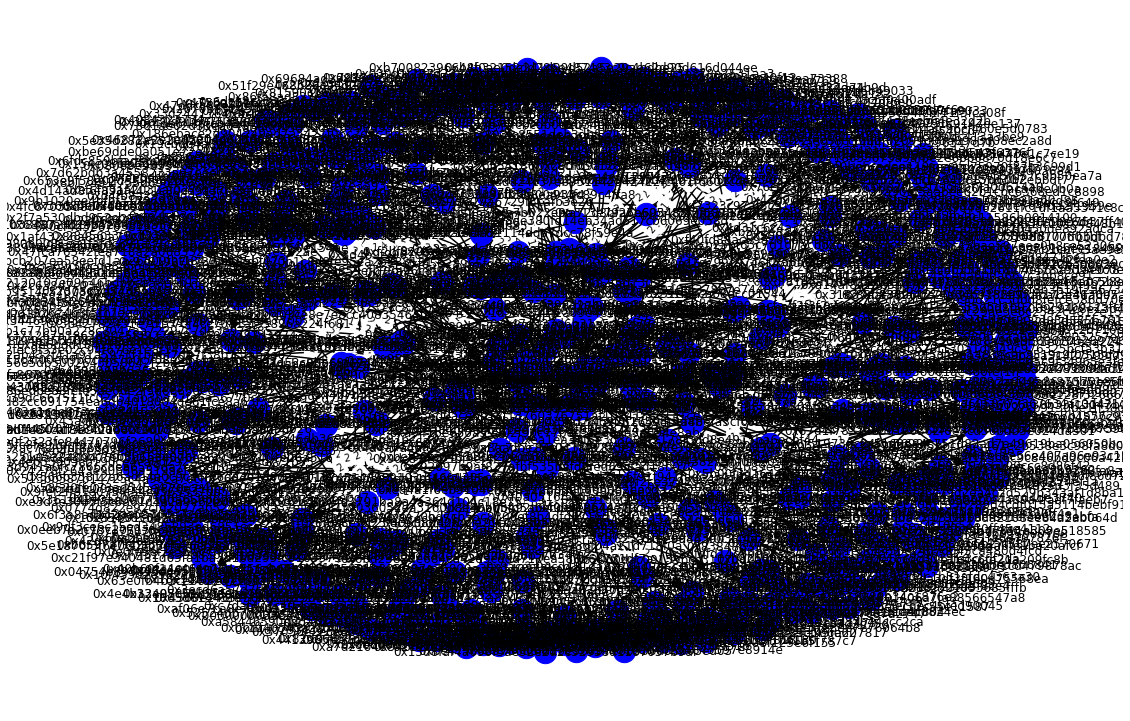

In [24]:
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
def plot_dg(df,col1,col2):
    DG = nx.from_pandas_edgelist(
        df=df,
        source=col1,
        target=col2,
        edge_attr=True,
        create_using=nx.DiGraph()
    )
    fig, ax = plt.subplots(figsize=(20, 13))
    fig.patch.set_facecolor('white')
    pos = nx.spring_layout(DG, iterations=50, seed=1721)
    nx.draw(
        G=DG,
        pos=pos,
        arrowsize=15,
        connectionstyle='arc3, rad = 0.1',
        node_color='blue',
        with_labels=True,
        node_size=500,
        width=1.5
        )
    nx.draw_networkx_edge_labels(
        DG,
        pos=pos,
        edge_labels=nx.get_edge_attributes(DG,'weight')
        )
    plt.show()
    
# nft_list = nft_data_merge[(nft_data_merge['label_iso'] == -1) & (nft_data_merge['outer_label'] == 1) & (nft_data_merge['seller_address'] !=zero_nft)]['nft_token_id']


cols = ['max_address','min_address']
nft_data_group_per = nft_data_group[nft_data_group['Group1'] == 33]
# nft_data_group_per.shape
# plot_dg(nft_data_group_per,cols[0],cols[1])

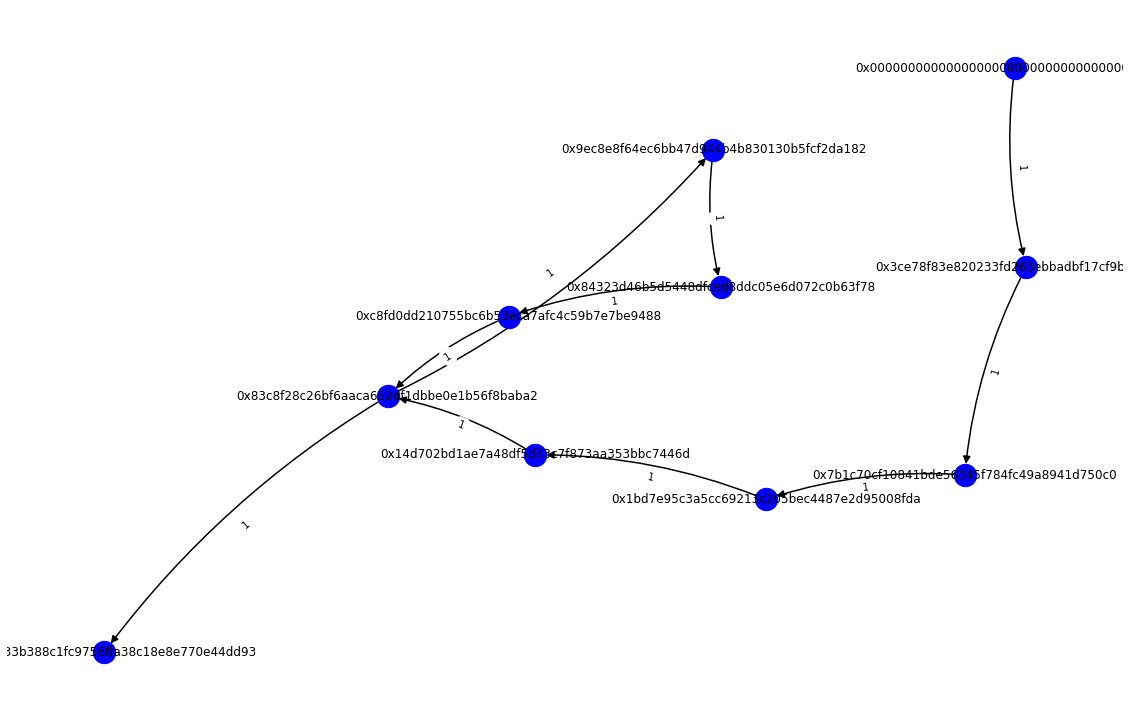

In [39]:
# nft_data = pd.concat([nft_tsf_data_new,nft_tra_data_new],ignore_index=True)
# print("开始排序")
# nft_data['rank11'] = nft_data.groupby(['seller_address','buyer_address','nft_token_id','block_timestamp']).amount.transform(lambda x:x.rank(ascending=False))
# nft_data = nft_data[nft_data['rank11']==1]
nft_data = nft_data.sort_values(by=['block_timestamp','block_number'])
nft_data_nft_per = nft_data[nft_data['nft_token_id'] == '72805']

# nft_data_nft_per['weight'] = (nft_data_nft_per['amount'] > 0).astype(int)
nft_data_nft_per = nft_data_nft_per.groupby(['seller_address','buyer_address']).agg({'nft_token_id':'count'})
nft_data_nft_per = nft_data_nft_per.rename(columns={'nft_token_id':'weight'}).reset_index()
cols = ['seller_address','buyer_address']

plot_dg(nft_data_nft_per,cols[0],cols[1])

# nft_data_nft_per = nft_data_nft_per.rename(column=.)
# nft_data.groupby([''])

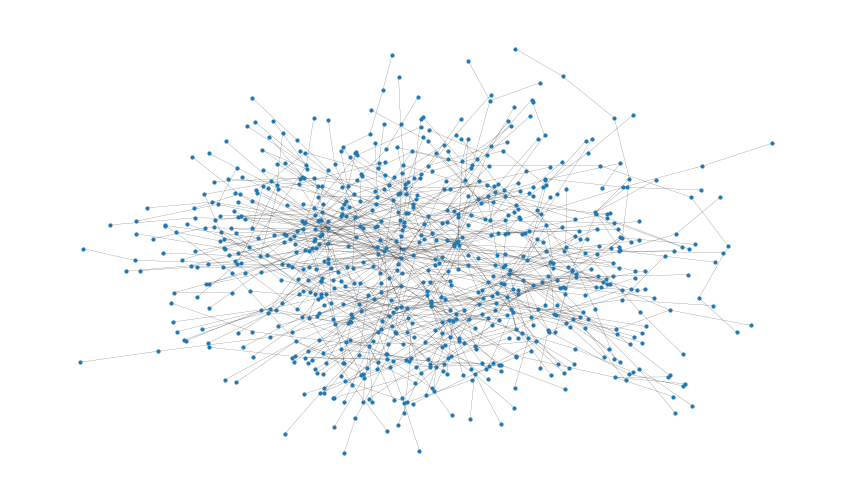

In [25]:
cols = ['max_address','min_address']
nft_data_group_per = nft_data_group[nft_data_group['Group1'] == 33]
# nft_data_group_per.shape
G1 = nx.from_pandas_edgelist(nft_data_group_per, "max_address", "min_address",
#                              edge_attr=True,
                             create_using=nx.Graph())
# nx.draw(G1,with_labels=False,node_size=50)
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
pos = nx.spring_layout(G1, iterations=10, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
fig.patch.set_facecolor('white')
ax.axis("off")
nx.draw_networkx(G1, pos=pos, ax=ax, **plot_options)

In [154]:
nft_data['nft_token_id'].value_counts()

86375    168
88040    166
82554    165
76305     45
93056     43
        ... 
74837      1
2807       1
44031      1
4077       1
42062      1
Name: nft_token_id, Length: 100000, dtype: int64

In [2]:
'done'

'done'

In [87]:
nft_data_group[(nft_data_group['Group1'] == 118)]

,max_address,min_address,weight,nft_token_id,Group1,Group2
467,0x1249d10619138cc56f1508b92b9ae4fcf4754e3b,0x0f8b89738a498e7d366c60977c9d84fc9c62f46e,3,3,118,118


In [43]:
nft_data_group[(nft_data_group['Group1'] == 110)]

,max_address,min_address,weight,Group1,Group2,sample_group
381,0x105d173e8aabd1ff43b6df60c80c3b355a1d8931,0x009a57f76a65fef6e81a57f4ad9dd0542fc98f41,4,110,110,1
12447,0x5bb79beed298160813ac4f2b22f0d3de8afee42b,0x105d173e8aabd1ff43b6df60c80c3b355a1d8931,4,110,110,1


In [73]:
nft_data_new.columns

Index(['seller_address', 'buyer_address', 'nft_token_id', 'amount',
       'max_address', 'min_address', 'weight'],
      dtype='object')

In [75]:
# nft_data_group = nft_data_desc.merge(df_group,how='left',left_on=['max_address'],right_on=['Id'])
# del nft_data_group['Id']
# nft_data_group = nft_data_group.rename(columns={'Group':'Group1'})
# nft_data_group = nft_data_group.merge(df_group,how='left',left_on=['min_address'],right_on=['Id'])
# del nft_data_group['Id']
# nft_data_group = nft_data_group.rename(columns={'Group':'Group2'})
# nft_data_group.head()

,max_address,min_address,weight,nft_token_id,Group1,Group2
0,0x00000003a567e3002f04d5d3db1abf0f94c43d11,0x00000000e7fc8fd904374460228f2fc5c2221408,1,1,0,0
1,0x005fe151d9185a30a11b3fc7233ca3b2cfee7ec5,0x002a99690ab1989b7971db28cd4a7673e1e6f495,2,1,1,2
2,0x007f97f5abade6757c66211449b23fdd82613854,0x00000000a50bb64b4bbeceb18715748dface08af,4,2,3,4
3,0x007f97f5abade6757c66211449b23fdd82613854,0x007f97f5abade6757c66211449b23fdd82613854,2,1,3,3
4,0x00dc591dcf57341c6fe4ad1ecf565b50f9059c27,0x0000000035634b55f3d99b071b5a354f48e10bef,2,1,5,6


In [76]:
# nft_data_group[(nft_data_group['sample_group'] == 1) & (nft_data_group['Group1'] == 245)]

KeyError: 'sample_group'

In [69]:
ad1 = '0x26d592bf7b143ec0cc7e3e9475d5575fe234865e'
ad2 = '0x23caefe5236da8d0505861c0cfac0820594444b0'
nft_data_group['nft_token_id'] <= 2
status1 = (nft_data_new['seller_address'] == ad1) & (nft_data_new['buyer_address'] == ad2)


status2 = (nft_data_new['seller_address'] == ad2) & (nft_data_new['buyer_address'] == ad1)

# status3 = 

In [70]:
nft_data_new[status1|status2]

,seller_address,buyer_address,nft_token_id,amount,max_address,min_address,weight
113456,0x26d592bf7b143ec0cc7e3e9475d5575fe234865e,0x23caefe5236da8d0505861c0cfac0820594444b0,17746,0.0,0x26d592bf7b143ec0cc7e3e9475d5575fe234865e,0x23caefe5236da8d0505861c0cfac0820594444b0,1
188085,0x23caefe5236da8d0505861c0cfac0820594444b0,0x26d592bf7b143ec0cc7e3e9475d5575fe234865e,17746,0.0,0x26d592bf7b143ec0cc7e3e9475d5575fe234865e,0x23caefe5236da8d0505861c0cfac0820594444b0,1
199597,0x26d592bf7b143ec0cc7e3e9475d5575fe234865e,0x23caefe5236da8d0505861c0cfac0820594444b0,17746,0.0,0x26d592bf7b143ec0cc7e3e9475d5575fe234865e,0x23caefe5236da8d0505861c0cfac0820594444b0,1


In [61]:
nft_data_new.head()

,seller_address,buyer_address,nft_token_id,amount,max_address,min_address,weight
15000,0xa858ddc0445d8131dac4d1de01f834ffcba52ef1,0xa1a70db1c9fc27d67c718ba0a77ba6542c43774b,33000,0.0,0xa858ddc0445d8131dac4d1de01f834ffcba52ef1,0xa1a70db1c9fc27d67c718ba0a77ba6542c43774b,1
15001,0xa858ddc0445d8131dac4d1de01f834ffcba52ef1,0x555d374379d7c3a1e0761e9638030bce3b9db5bd,33001,0.0,0xa858ddc0445d8131dac4d1de01f834ffcba52ef1,0x555d374379d7c3a1e0761e9638030bce3b9db5bd,1
15002,0xa858ddc0445d8131dac4d1de01f834ffcba52ef1,0x716174da169352bdfe26f6a4f8f22bf290beeca1,33002,0.0,0xa858ddc0445d8131dac4d1de01f834ffcba52ef1,0x716174da169352bdfe26f6a4f8f22bf290beeca1,1
15003,0xa858ddc0445d8131dac4d1de01f834ffcba52ef1,0xec47741b1102b74c51cd673fe5572719add8a838,33003,0.0,0xec47741b1102b74c51cd673fe5572719add8a838,0xa858ddc0445d8131dac4d1de01f834ffcba52ef1,1
15004,0xa858ddc0445d8131dac4d1de01f834ffcba52ef1,0xca38ca4e27f5a80fdbb0a3493831f9ab9fbeb9d1,33004,0.0,0xca38ca4e27f5a80fdbb0a3493831f9ab9fbeb9d1,0xa858ddc0445d8131dac4d1de01f834ffcba52ef1,1


In [38]:
G = nx.DiGraph([(0, 1),(1, 0), ( 2,0), (1, 2)])
# list(nx.find_cycle(G, orientation="ignore"))

# nx.cycle_basis(G.to_undirected())
nx.cycle_basis(G.to_undirected())

[[1, 2, 0]]

In [28]:
nft_data.head()

,transaction_hash,log_index,nft_token_id,block_number,block_date,block_timestamp,seller_address,buyer_address,amount,rank11,rank1,rank2,rank_final,rank3
0,0xe89f544d0a91ab101e390657688ec33706479ff33073...,13,30000,14679593,2022-04-29,2022-04-29 13:58:11,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,0.0,1.0,1.0,1.0,1.1,1.0
1,0xe89f544d0a91ab101e390657688ec33706479ff33073...,14,30001,14679593,2022-04-29,2022-04-29 13:58:11,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,0.0,1.0,1.0,1.0,1.1,1.0
2,0xe89f544d0a91ab101e390657688ec33706479ff33073...,15,30002,14679593,2022-04-29,2022-04-29 13:58:11,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,0.0,1.0,1.0,1.0,1.1,1.0
3,0xe89f544d0a91ab101e390657688ec33706479ff33073...,16,30003,14679593,2022-04-29,2022-04-29 13:58:11,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,0.0,1.0,1.0,1.0,1.1,1.0
4,0xe89f544d0a91ab101e390657688ec33706479ff33073...,17,30004,14679593,2022-04-29,2022-04-29 13:58:11,0x0000000000000000000000000000000000000000,0xef9497439548c5967b179d80a49e829efa2a9300,0.0,1.0,1.0,1.0,1.1,1.0


In [40]:
# nft_data_nft_per = nft_data[nft_data['nft_token_id'] == '72805']
nft_data_nft_per = nft_data[nft_data['nft_token_id'] == '72805']
G1 = nx.from_pandas_edgelist(nft_data_nft_per, "seller_address", "buyer_address",
#                              edge_attr=True,
                             create_using=nx.Graph())
# list(nx.find_cycle(G1, orientation="ignore"))

nx.cycle_basis(G1)

[['0x9ec8e8f64ec6bb47d944b4b830130b5fcf2da182',
  '0x84323d46b5d5448dfced8ddc05e6d072c0b63f78',
  '0xc8fd0dd210755bc6b53eca7afc4c59b7e7be9488',
  '0x83c8f28c26bf6aaca652df1dbbe0e1b56f8baba2']]

In [41]:
nx.cycle_basis(G1)

[['0x9ec8e8f64ec6bb47d944b4b830130b5fcf2da182',
  '0x84323d46b5d5448dfced8ddc05e6d072c0b63f78',
  '0xc8fd0dd210755bc6b53eca7afc4c59b7e7be9488',
  '0x83c8f28c26bf6aaca652df1dbbe0e1b56f8baba2']]

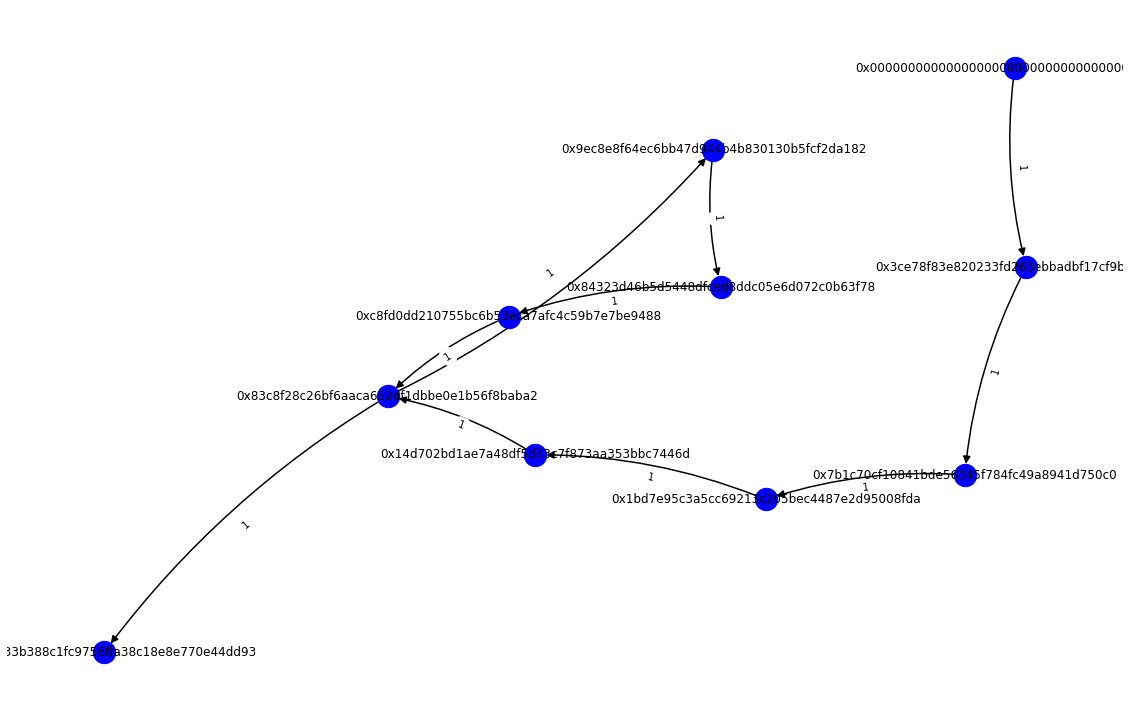

In [45]:
nft_data = nft_data.sort_values(by=['block_timestamp','block_number','log_index'])
nft_data_nft_per = nft_data[nft_data['nft_token_id'] == '72805']

# nft_data_nft_per['weight'] = (nft_data_nft_per['amount'] > 0).astype(int)
nft_data_nft_per = nft_data_nft_per.groupby(['seller_address','buyer_address']).agg({'nft_token_id':'count'})
nft_data_nft_per = nft_data_nft_per.rename(columns={'nft_token_id':'weight'}).reset_index()
cols = ['seller_address','buyer_address']

plot_dg(nft_data_nft_per,cols[0],cols[1])

In [46]:
nft_data_nft_per

,seller_address,buyer_address,weight
0,0x0000000000000000000000000000000000000000,0x3ce78f83e820233fd263ebbadbf17cf9b57ba2be,1
1,0x14d702bd1ae7a48df5d33c7f873aa353bbc7446d,0x83c8f28c26bf6aaca652df1dbbe0e1b56f8baba2,1
2,0x1bd7e95c3a5cc69213c205bec4487e2d95008fda,0x14d702bd1ae7a48df5d33c7f873aa353bbc7446d,1
3,0x3ce78f83e820233fd263ebbadbf17cf9b57ba2be,0x7b1c70cf10841bde56345f784fc49a8941d750c0,1
4,0x7b1c70cf10841bde56345f784fc49a8941d750c0,0x1bd7e95c3a5cc69213c205bec4487e2d95008fda,1
5,0x83c8f28c26bf6aaca652df1dbbe0e1b56f8baba2,0x9d6c133b388c1fc9756ffa38c18e8e770e44dd93,1
6,0x83c8f28c26bf6aaca652df1dbbe0e1b56f8baba2,0x9ec8e8f64ec6bb47d944b4b830130b5fcf2da182,1
7,0x84323d46b5d5448dfced8ddc05e6d072c0b63f78,0xc8fd0dd210755bc6b53eca7afc4c59b7e7be9488,1
8,0x9ec8e8f64ec6bb47d944b4b830130b5fcf2da182,0x84323d46b5d5448dfced8ddc05e6d072c0b63f78,1
9,0xc8fd0dd210755bc6b53eca7afc4c59b7e7be9488,0x83c8f28c26bf6aaca652df1dbbe0e1b56f8baba2,1


In [1]:
nft_data[nft_data['nft_token_id'] == '72805']

NameError: name 'nft_data' is not defined

In [ ]:
import pandas as pd
import numpy as np
import sys 
sys.path.append('/utils/')
from connection import get_connection
conn = get_connection()
sql_cont1 = '''

'''

def get_data(sql_cont):
    data = pd.read_sql(sql_cont, con = conn)
    return data
sql_cont1 = '''
select * from `nft_transactions` where  lower(`nft_transactions`.`collection_contract_address`)=lower('0x34d85c9CDeB23FA97cb08333b511ac86E1C4E258')
'''
sql_cont2 = '''
select * from `nft_transfers` where lower(`nft_transfers`.`token_address`)=lower('0x34d85c9CDeB23FA97cb08333b511ac86E1C4E258') 
'''

print("get_data(sql_cont1)")
nft_tra_data = get_data(sql_cont1)
print("get_data(sql_cont2)")
nft_tsf_data = get_data(sql_cont2)
col1 = ['transaction_hash','log_index','nft_token_id', 'block_number','block_date','block_timestamp','seller_address','buyer_address','amount']
col2 = ['transaction_hash','log_index','nft_token_id','block_number','block_date','block_timestamp','from_address','to_address']
nft_tsf_data_new = nft_tsf_data[col2]
nft_tsf_data_new = nft_tsf_data_new.rename(columns={'from_address':'seller_address',
                                                   'to_address':'buyer_address'})

nft_tsf_data_new['amount'] = 0
nft_tra_data_new = nft_tra_data[col1]
nft_data = pd.concat([nft_tsf_data_new,nft_tra_data_new],ignore_index=True)
print("开始排序")
nft_data['rank11'] = nft_data.groupby(['seller_address','buyer_address','nft_token_id','block_timestamp']).amount.transform(lambda x:x.rank(ascending=False))
nft_data = nft_data[nft_data['rank11']==1]


print("排序完成")

nft_data = nft_data.sort_values(by=['block_timestamp','block_number','log_index'])
nft_data = nft_data.drop_duplicates()
nft_data['rank1'] = nft_data.groupby(['nft_token_id','block_timestamp']).log_index.transform(lambda x:x.rank())
nft_data_cp = nft_data[['nft_token_id','block_timestamp']].drop_duplicates()

nft_data_cp['rank2'] = nft_data_cp.groupby(['nft_token_id']).block_timestamp.transform(lambda x:x.rank())
nft_data = nft_data.merge(nft_data_cp,how='left',on=['nft_token_id','block_timestamp'])
nft_data['rank_final'] = nft_data['rank1'] + nft_data['rank2']*0.1
nft_data['rank3'] = nft_data.groupby(['nft_token_id']).rank_final.transform(lambda x:x.rank())

tg_cols = ['seller_address','buyer_address','nft_token_id','amount','log_index','block_number','block_timestamp']
nft_data_new = nft_data[tg_cols]
nft_data_new.head()

# 1、至少存在一次amount非0交易
# 2、至少存在两次交易（包含0）
add_cols = ['seller_address','buyer_address']
nft_data_new['max_address'] = nft_data[add_cols].max(axis=1)
nft_data_new['min_address'] = nft_data[add_cols].min(axis=1)
print("group by")
nft_ad_tr_cnt = nft_data_new[nft_data_new['amount'] > 0].groupby(['nft_token_id','max_address','min_address']).agg({'log_index':'count'})
nft_ad_tr_cnt = nft_ad_tr_cnt[nft_ad_tr_cnt['log_index'] >= 1]
nft_ad_tr_cnt = nft_ad_tr_cnt.rename(columns={'log_index':'transaction_cnt'}).reset_index()

nft_ad_tr_cnt2 = nft_data_new.groupby(['nft_token_id','max_address','min_address']).agg({'log_index':'count'})
nft_ad_tr_cnt2 = nft_ad_tr_cnt2[nft_ad_tr_cnt2['log_index'] >= 2]
nft_ad_tr_cnt2 = nft_ad_tr_cnt2.rename(columns={'log_index':'action_cnt'}).reset_index()

nft_ad_tr_cnt = nft_ad_tr_cnt.merge(nft_ad_tr_cnt2,how='inner',on=['nft_token_id','max_address','min_address'])


import networkx as nx
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

nft_id_list = nft_data['nft_token_id'].unique().tolist()
# nft_id = nft_id_list[1]

cycle_nft = []

cycle_nft_list ={}

for nft_id in nft_id_list:
#     print("nft_id",nft_id)
#     print(nft_id)


    data_nft = nft_data[nft_data['nft_token_id'] == nft_id]

    data_nft_weight = data_nft.groupby(["seller_address", "buyer_address"]).agg({'log_index':'count'})
    data_nft_weight = data_nft_weight.rename(columns={'log_index':'weight'}).reset_index()




    G1 = nx.from_pandas_edgelist(data_nft_weight, "seller_address", "buyer_address",
    #                              edge_attr=True,
                                 create_using=nx.Graph())

    list_cycle = nx.cycle_basis(G1)
    if len(list_cycle) > 0:
        cycle_nft.append(nft_id)
        cycle_nft_list[nft_id] = list_cycle
        print("="*30)
        print(nft_id)
#         print(list_cycle)
'done'

